<a href="https://colab.research.google.com/github/poojaneuusa/Image-Processing-Projects/blob/main/Text_to_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install sentence_transformers

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  
  inflating: photos/UO-cOtxGbgk.jpg  

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

[{'corpus_id': 716, 'score': 0.286196231842041}, {'corpus_id': 1198, 'score': 0.2854779362678528}, {'corpus_id': 714, 'score': 0.28330957889556885}]
Query:  man on the mountain
photos/IYuaxnKSfeI.jpg


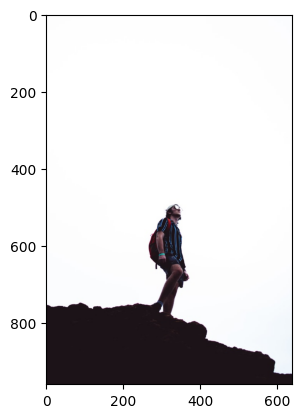

photos/_bbDrYNdkGE.jpg


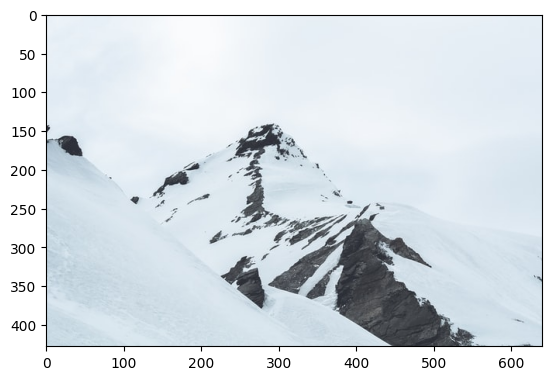

photos/VTXU8ff8FIU.jpg


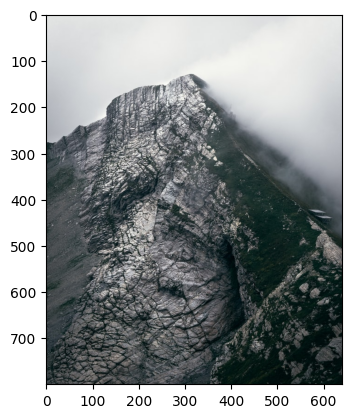

In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

model = SentenceTransformer('clip-ViT-B-32')

!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

!unzip 'unsplash-25k-photos.zip' -d 'photos'

img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

img_names[0]

img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

search('man on the mountain')


[{'corpus_id': 1756, 'score': 1.0}, {'corpus_id': 1764, 'score': 0.9140019416809082}, {'corpus_id': 1392, 'score': 0.9036898612976074}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x959 at 0x7F0AC8922050>
photos/2MG9GP29gMM.jpg


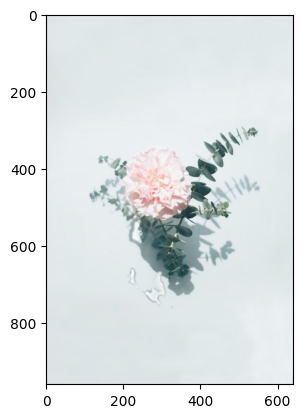

photos/qgkK0dWOhdY.jpg


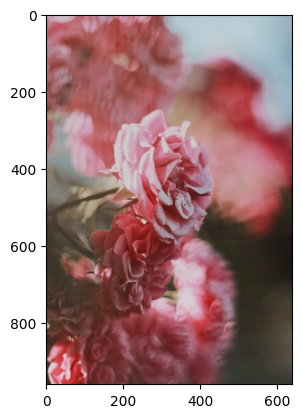

photos/KWvhJuC3TSI.jpg


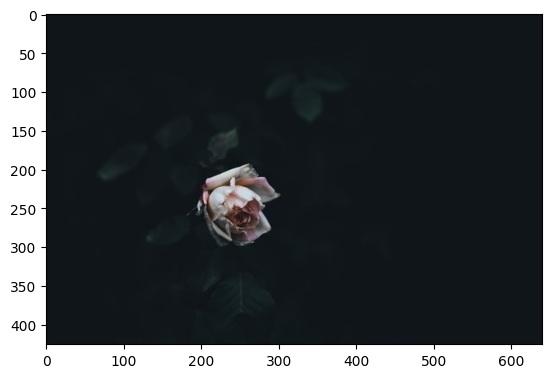

In [3]:
Image.open(img_names[1232])
search(Image.open(img_names[1756]))

[{'corpus_id': 1889, 'score': 0.29119229316711426}, {'corpus_id': 117, 'score': 0.2802831530570984}, {'corpus_id': 309, 'score': 0.2741173803806305}]
Query:  cute dogs
photos/yCKKd37OsgI.jpg


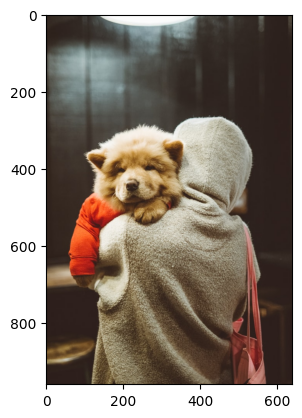

photos/NYuUoKjJR-c.jpg


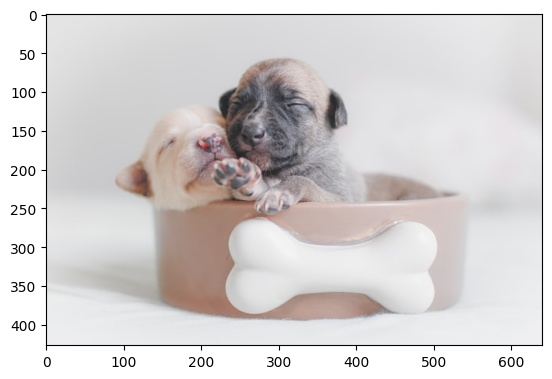

photos/U8pgck1dgtQ.jpg


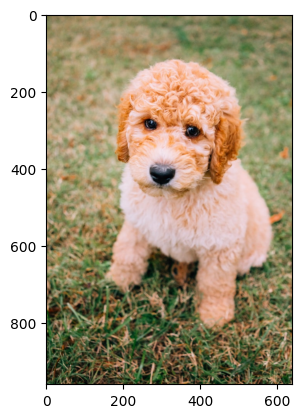

In [5]:
search('cute dogs')